# Resampling

Two kinds of resampling:
- Upsampling: Where you increase the frequency of the samples, such as from minutes to seconds.
- Downsampling: Where you decrease the frequency of the samples, such as from days to months.

Two reasons for resampling:
- Problem Framing: Resampling may be required if your data is not available at the same frequency that you want to make predictions.
- Feature Engineering: Resampling can also be used to provide additional structure or insight into the learning problem for supervised learning models.

In [1]:
# import packages
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# get and clean data
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

df = pd.read_csv("./data/shampoo-sales.csv",
                 delimiter='\t',
                 index_col='Month',
                 parse_dates=True,
                 date_parser=parser)

In [3]:
df.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


## Upsampling

Increase times series frequency (Month -> Day)

In [4]:
upsampled = df.resample('1D').mean()

In [5]:
upsampled.head(32)

,Sales
Month,
1901-01-01,266.0
1901-01-02,NaN
1901-01-03,NaN
1901-01-04,NaN
1901-01-05,NaN
1901-01-06,NaN
1901-01-07,NaN
1901-01-08,NaN
1901-01-09,NaN


In [6]:
interpolated = upsampled.interpolate(method='linear')

In [7]:
interpolated.head(32)

,Sales
Month,
1901-01-01,266.000000
1901-01-02,262.125806
1901-01-03,258.251613
1901-01-04,254.377419
1901-01-05,250.503226
1901-01-06,246.629032
1901-01-07,242.754839
1901-01-08,238.880645
1901-01-09,235.006452


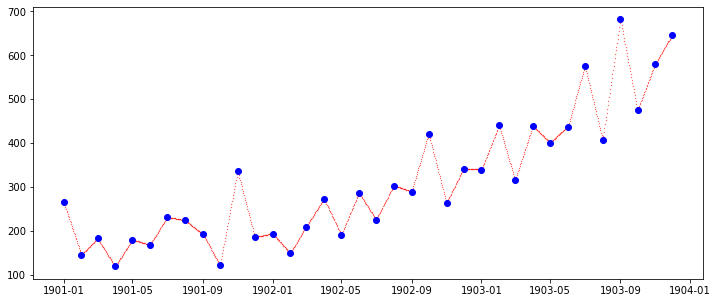

In [8]:
fig = plt.figure(figsize=(12,5))
_ = plt.plot(interpolated, color='red', label='interpolated', marker='.',
              markersize=0.5, linewidth=0)
_ = plt.plot(df, color='blue', label='original data', linewidth=0,
            marker='o')
_ = plt.show()

In [9]:
interpolated = upsampled.interpolate(method='spline', order=2)

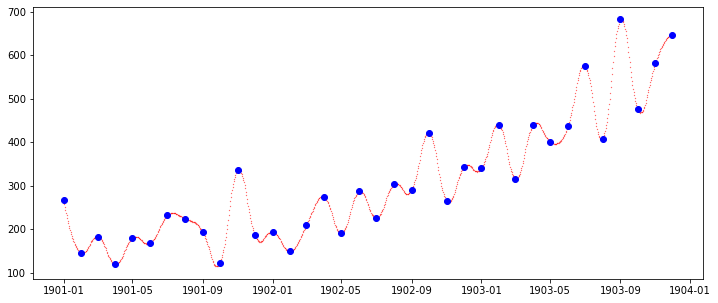

In [10]:
fig = plt.figure(figsize=(12,5))
_ = plt.plot(interpolated, color='red', label='interpolated', marker='.',
              markersize=0.5, linewidth=0)
_ = plt.plot(df, color='blue', label='original data', linewidth=0,
            marker='o')
_ = plt.show()

## Downsampling

Decrease times series frequency (Month -> Year)

In [11]:
annual_df = df.resample('A').mean()

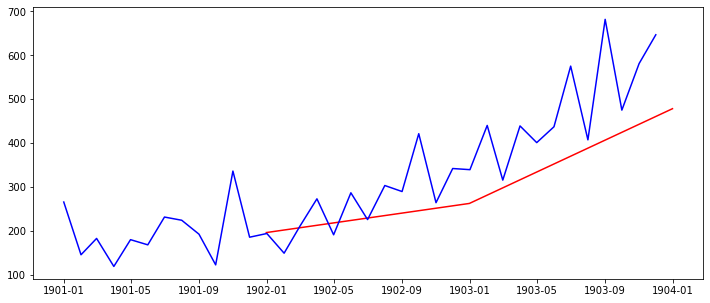

In [12]:
fig = plt.figure(figsize=(12,5))
_ = plt.plot(annual_df, color='red', label='annual sum')
_ = plt.plot(df, color='blue', label='original data')
_ = plt.show()

In [13]:
Q_df = df.resample('Q').mean()

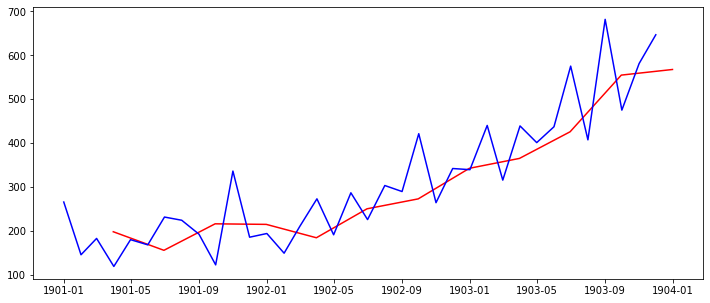

In [14]:
fig = plt.figure(figsize=(12,5))
_ = plt.plot(Q_df, color='red', label='quarterly sum')
_ = plt.plot(df, color='blue', label='original data')
_ = plt.show()